**Elevyo Internship Task 1: Student Score Prediction**

**Importing Dependencies**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection**

In [3]:
# Loading the dataset into a pandas dataframe
student_df = pd.read_csv("StudentPerformanceFactors.csv")

In [4]:
# Printing the first five rows of the dataset
student_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
# Getting the number of rows and columns of the dataset
student_df.shape

(6607, 20)

In [6]:
# Getting some info about the dataset
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
# Checking for null values
student_df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
# Drop missing values
student_df.dropna(inplace=True)

In [9]:
student_df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [10]:
# Statistical measure of the dataset
student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


**Data Visualization**

**Question 1: How many male and female students are in the school?**

In [11]:
# Getting the number of male and female students
gender = student_df["Gender"].value_counts().reset_index()
gender

,index,Gender
0,Male,3688
1,Female,2690


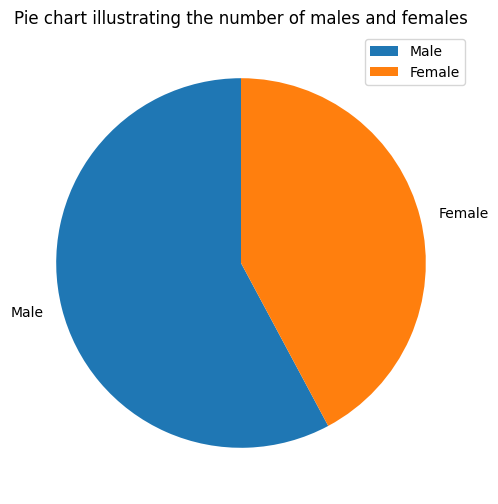

In [12]:
# Visualizing using a bar chart
plt.figure(figsize=(8,6))
plt.pie(gender["Gender"], labels=gender["index"], startangle=90)
plt.title("Pie chart illustrating the number of males and females")
plt.legend()
plt.show()

**Question 2: How many people participate in extracurricular activities?**

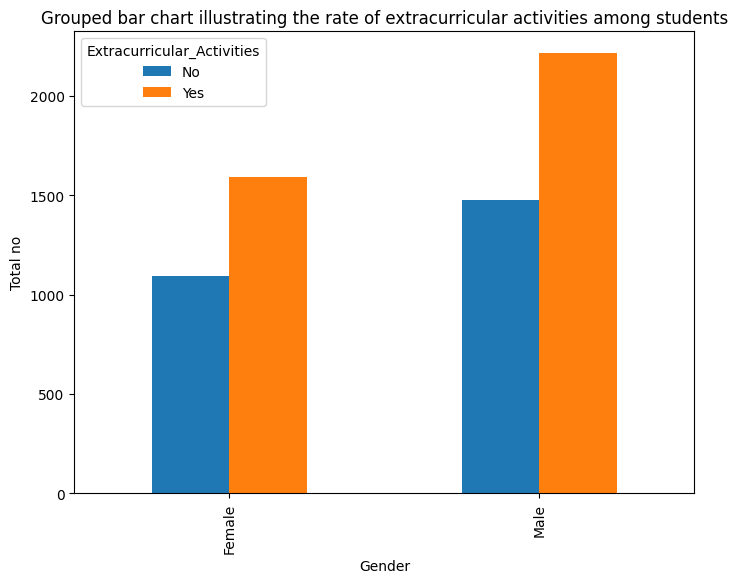

In [13]:
student_extra = student_df[["Gender", "Extracurricular_Activities"]].value_counts().reset_index()
# # Renaming a column
student_extra.columns.values[-1] = "Total_no"
# Constructing the grouped bar chart
pivot_df = student_extra.pivot(index="Gender", columns="Extracurricular_Activities", values="Total_no")
# pivot_df
pivot_df.plot(kind="bar", figsize=(8,6))
plt.xlabel("Gender")
plt.ylabel("Total no")
plt.title("Grouped bar chart illustrating the rate of extracurricular activities among students")
plt.show()

**What is the rate of students that have access to resources?**

In [14]:
access_to_resources = student_df["Access_to_Resources"].value_counts().reset_index()
access_to_resources

,index,Access_to_Resources
0,Medium,3204
1,High,1900
2,Low,1274


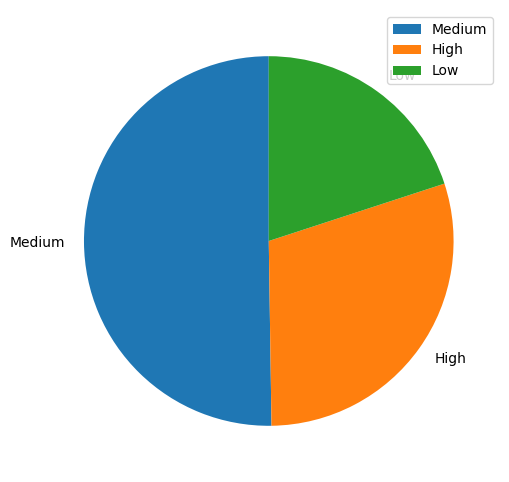

In [15]:
plt.figure(figsize=(8,6))
plt.pie(access_to_resources["Access_to_Resources"], labels=access_to_resources["index"], startangle=90)
plt.legend()
plt.show()

**Question 4: What is the relationship between students and family income?**

In [16]:
student_df.value_counts()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  Parental_Education_Level  Distance_from_Home  Gender  Exam_Score
1              69          High                  Medium               Yes                         6            97               Medium            Yes              1                  Low            Medium           Public       Positive        3                  No                     High School               Near                Female  61            1
23             64          Low                   Medium               Yes                         7            69               High              Yes              4                  High           Medium           Public       Positive        3                  No                     High Schoo

In [17]:
family_income = student_df[["Gender", "Family_Income"]].value_counts().reset_index()
family_income.columns.values[-1] = "Total"
family_income

,Gender,Family_Income,Total
0,Male,Low,1490
1,Male,Medium,1489
2,Female,Low,1092
3,Female,Medium,1077
4,Male,High,709
5,Female,High,521


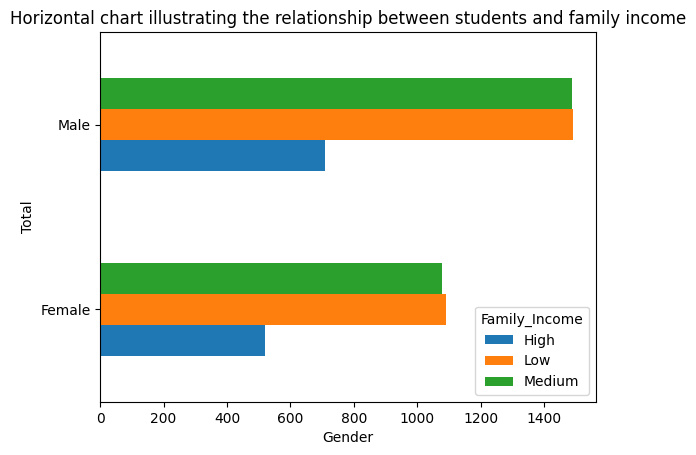

In [18]:
# Constructing a horizontal bar chart
pivot_family_income_df = family_income.pivot(index="Gender", columns="Family_Income", values="Total")
# pivot_family_income_df
pivot_family_income_df.plot(kind="barh")
plt.xlabel("Gender")
plt.ylabel("Total")
plt.title("Horizontal chart illustrating the relationship between students and family income")
plt.show()

**Question 5: What is the record on students sleeping hours?**

In [19]:
sleep_hrs = student_df["Sleep_Hours"].value_counts().reset_index()
sleep_hrs.columns = ["Hours", "Total no. of students"]
sleep_hrs

,Hours,Total no. of students
0,7,1682
1,8,1354
2,6,1322
3,9,753
4,5,668
5,10,303
6,4,296


<Figure size 800x600 with 0 Axes>

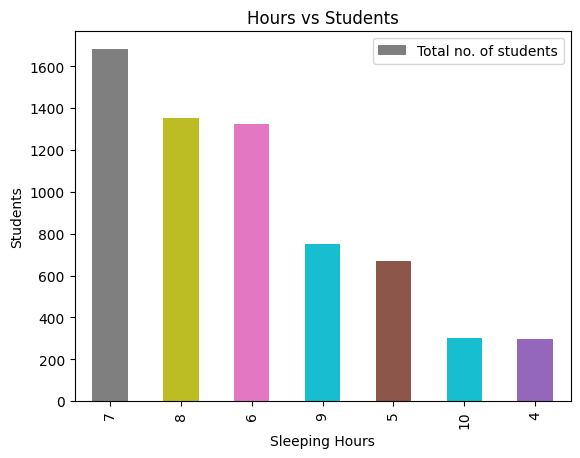

In [20]:
# Constructing a bar chart
plt.figure(figsize=(8,6))
colors = plt.cm.tab10(sleep_hrs["Hours"])
sleep_hrs.plot(x="Hours", y="Total no. of students", kind="bar", color=colors)
plt.title("Hours vs Students")
plt.xlabel("Sleeping Hours")
plt.ylabel("Students")
plt.legend()
plt.show()

**Question 6: What is the average exam score?**

In [21]:
# Getting the average exam score
average_exam_score = student_df["Exam_Score"].mean()
print(f"Average exam score: {round(average_exam_score, 2)}")

Average exam score: 67.25


**Question 7: What are the lowest and highest exam scores?**

In [22]:
lowest_score = student_df["Exam_Score"].min()
highest_score = student_df["Exam_Score"].max()
print(f"Lowest score: {lowest_score}\nHighest score: {highest_score}")

Lowest score: 55
Highest score: 101


**Question 8: What are the parental education level?**

In [23]:
parental_df = student_df["Parental_Education_Level"].value_counts().reset_index()
parental_df

,index,Parental_Education_Level
0,High School,3159
1,College,1939
2,Postgraduate,1280


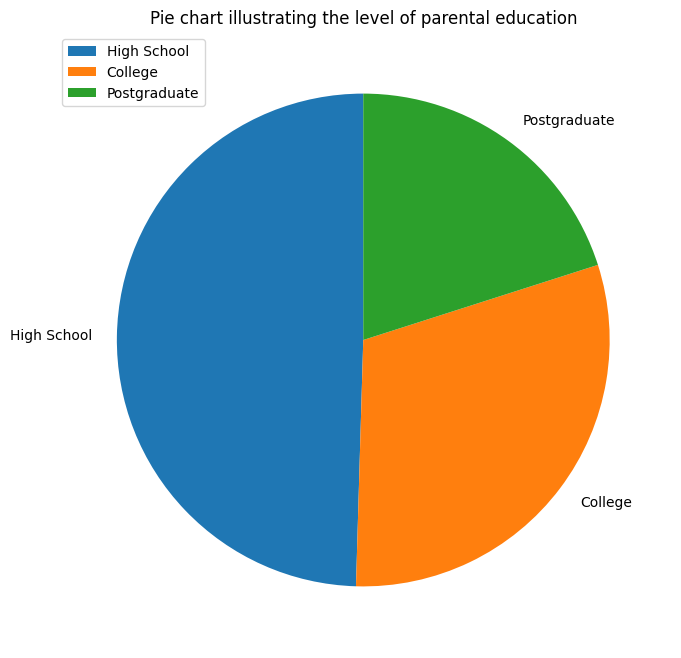

In [24]:
# Constructing the chart
plt.figure(figsize=(10, 8))
plt.pie(parental_df["Parental_Education_Level"], labels=parental_df["index"], startangle=90)
plt.title("Pie chart illustrating the level of parental education")
plt.legend(loc="upper left")
plt.show()

**Miscellaneous Visualizations**

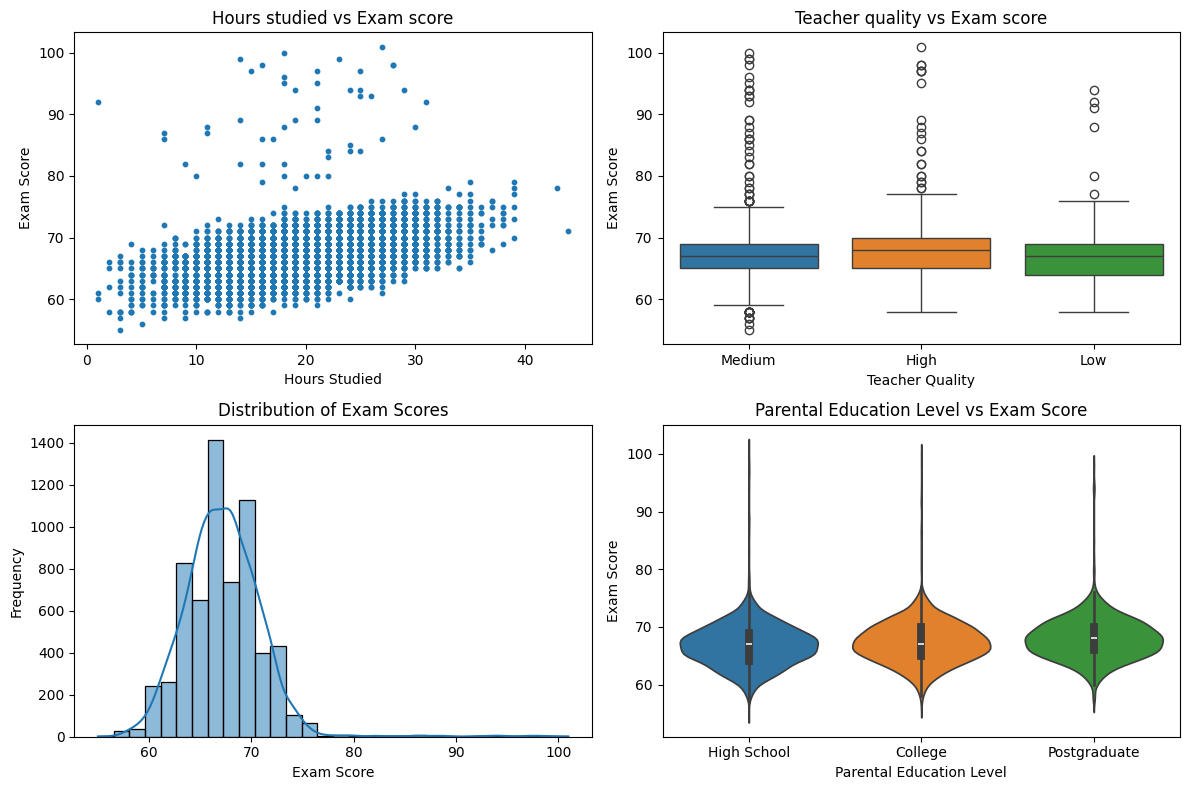

In [70]:
# Creating a figure for the plots
plt.figure(figsize=(12, 8))

# Hours studied vs Exam score
plt.subplot(2, 2, 1)
plt.scatter(student_df["Hours_Studied"], student_df["Exam_Score"], s=10)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours studied vs Exam score")

# Teacher quality vs Exam score
plt.subplot(2, 2, 2)
sns.boxplot(x=student_df["Teacher_Quality"], y=student_df["Exam_Score"], hue="Teacher_Quality", data=student_df)
plt.xlabel("Teacher Quality")
plt.ylabel("Exam Score")
plt.title("Teacher quality vs Exam score")


# Exam score distribution
plt.subplot(2, 2, 3)
sns.histplot(student_df["Exam_Score"], kde=True, bins=30)
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Scores")

# Parental education level vs Exam score
plt.subplot(2, 2, 4)
sns.violinplot(x="Parental_Education_Level", y="Exam_Score", hue="Parental_Education_Level", data=student_df)
plt.xlabel("Parental Education Level")
plt.ylabel("Exam Score")
plt.title("Parental Education Level vs Exam Score")

plt.tight_layout()
plt.show()

**Train Test Split**

In [26]:
# Separating the data into features and target
X = student_df[["Hours_Studied"]]
Y = student_df["Exam_Score"]

In [27]:
X

,Hours_Studied
0,23
1,19
2,24
3,29
4,19
...,...
6602,25
6603,23
6604,20
6605,10


In [28]:
# Splitting the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(6378, 1) (5740, 1) (638, 1)


**Model Evaluation**

In [30]:
# Loading the model
model = LinearRegression()

In [31]:
# Training the model
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
# Predicting the exam scores based on hours studied
Y_test_pred = model.predict(X_test)

In [33]:
# Metrics on test data

# R2 score
r2_score = metrics.r2_score(Y_test, Y_test_pred)
print(f"R2 score: {r2_score}")

# MSE
mse = metrics.mean_squared_error(Y_test, Y_test_pred)
print(f"MSE: {mse}")

# RMSE
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
print(f"RMSE: {rmse}")

R2 score: 0.23818098045578684
MSE: 8.954474702400237
RMSE: 2.99240283090366


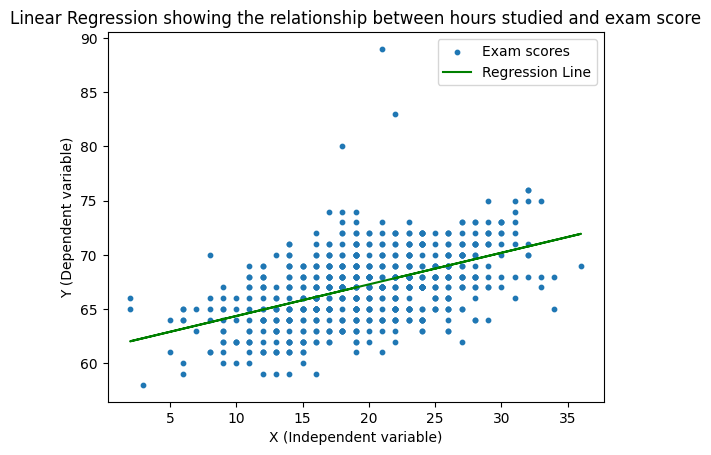

In [71]:
plt.scatter(X_test, Y_test, label="Exam scores", s=10)
plt.plot(X_test, Y_test_pred, color="green", label="Regression Line")
plt.xlabel("X (Independent variable)")
plt.ylabel("Y (Dependent variable)")
plt.title("Linear Regression showing the relationship between hours studied and exam score")
plt.legend()
plt.show()

**Making a predictive system**

In [35]:
# Define input data
input_data = (23)

# Converting to numpy array
input_np_data = np.asarray(input_data)

# Reshaping the array as an instance
reshape_np_data = input_np_data.reshape(1, -1)

# Making predictions
pred = model.predict(reshape_np_data)
print(f"Prediction: {pred[0]}")

Prediction: 68.14970055207378


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
